# Lógica Fuzzy com Python: O Guia para Iniciantes: Exemplo do aspirador de pó

**Antecedentes (entradas)**

Superfície: qual o nível de dificuldade da superfície, em uma escala de 0 a 5?
- fácil, moderada, difícil

Sujeira: qual a quantidade de sujeira, em uma escala de 0 a 5?
- leve, moderada, pesada

**Consequente (saída)**

Sucção: qual o nível de sucção que o aspirador de pó deve ser configurado, entre 0% e 10%?
- baixa, média, alta

Regras
- Se a superfície for *fácil* e a sujeira for *leve* então a sucção será *baixa*
- Se a superfície for *moderada* e a sujeira for *leve* então a sucção será *média*
- Se a superfície for *difícil* ou a sujeira for *pesada* então a sucção será *alta*
- Se a superfície for *moderada* então a sucção será *média*

## Antecedentes e consequente

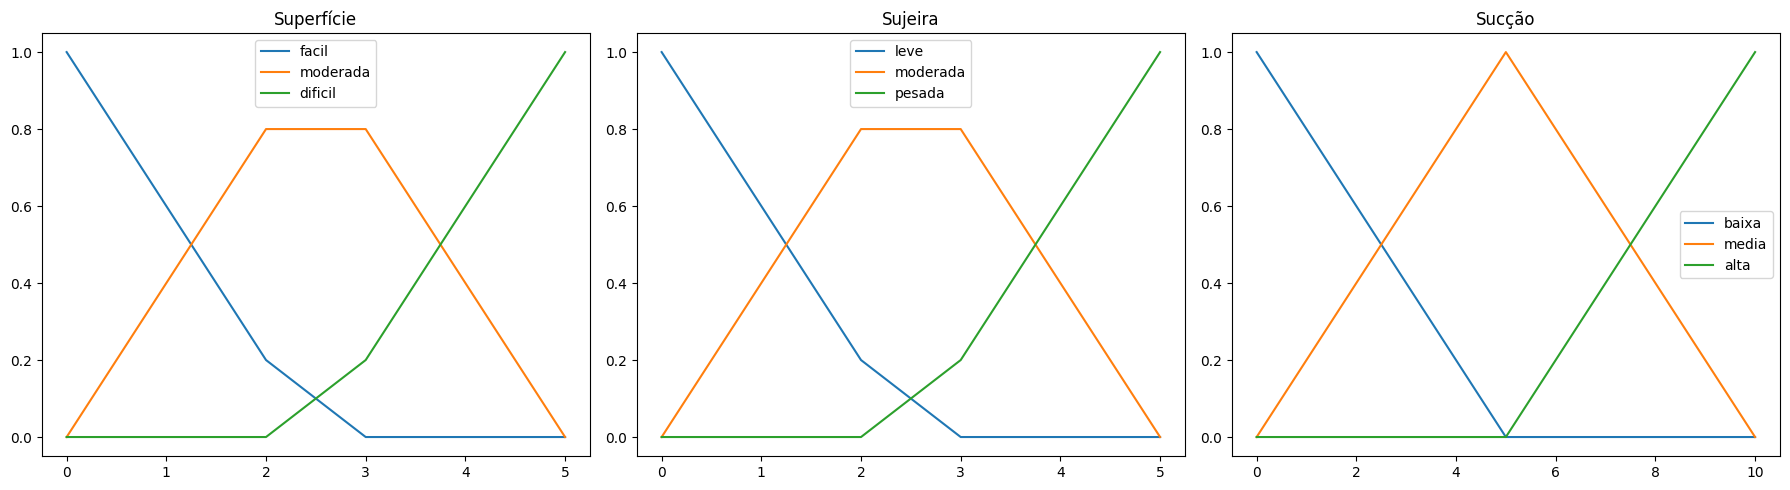

In [ ]:
import numpy as np                 # Para operações numéricas e criação de intervalos
import skfuzzy as fuzz             # Para lógica fuzzy e funções de pertinência
from skfuzzy import control as ctrl  # Para criar o sistema fuzzy de controle
import matplotlib.pyplot as plt    # Para criar os gráficos

# ----------------------------
#   DEFINIÇÃO DAS VARIÁVEIS FUZZY
# ----------------------------
superficie = ctrl.Antecedent(np.arange(0, 6, 1), 'superficie') # Cria a variável de entrada 'superficie' variando de 0 a 5
sujeira = ctrl.Antecedent(np.arange(0, 6, 1), 'sujeira') # Cria a variável de entrada 'sujeira' variando de 0 a 5
succao = ctrl.Consequent(np.arange(0, 11, 1), 'succao') # Cria a variável de saída 'succao' variando de 0 a 10

# ----------------------------
#   DEFINIÇÃO DOS CONJUNTOS FUZZY
# ----------------------------
# Para as entradas: define automaticamente 3 categorias cada uma
superficie.automf(number=3, names=['facil', 'moderada', 'dificil'])
sujeira.automf(number=3, names=['leve', 'moderada', 'pesada'])
# Para a saída: define manualmente 3 funções triangulares
succao['baixa'] = fuzz.trimf(succao.universe, [0, 0, 5])
succao['media'] = fuzz.trimf(succao.universe, [0, 5, 10])
succao['alta'] = fuzz.trimf(succao.universe, [5, 10, 10])

# ----------------------------
#    PLOT DO PRIMEIRO GRÁFICO: SUPERFICIE
# ----------------------------
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18, 5)) # Cria a figura com 1 linha e 3 colunas de gráficos lado a lado
for term_name in superficie.terms: # Para cada termo linguístico de 'superficie' (facil, moderada, dificil):
    axs[0].plot(superficie.universe, superficie[term_name].mf, label=term_name) # Plota a função de pertinência desse termo
axs[0].set_title('Superfície')
axs[0].legend()
for term_name in sujeira.terms: # Para cada termo de 'sujeira' (leve, moderada, pesada):
    axs[1].plot(sujeira.universe, sujeira[term_name].mf, label=term_name)
axs[1].set_title('Sujeira')
axs[1].legend()
for term_name in succao.terms: # Para cada termo de 'succao' (baixa, media, alta):
    axs[2].plot(succao.universe, succao[term_name].mf, label=term_name)
axs[2].set_title('Sucção')
axs[2].legend()
plt.tight_layout() # Ajusta os espaçamentos para que os títulos e legendas não se sobreponham
plt.show() # Mostra o painel completo

# Outras funções

1.6638364995712556


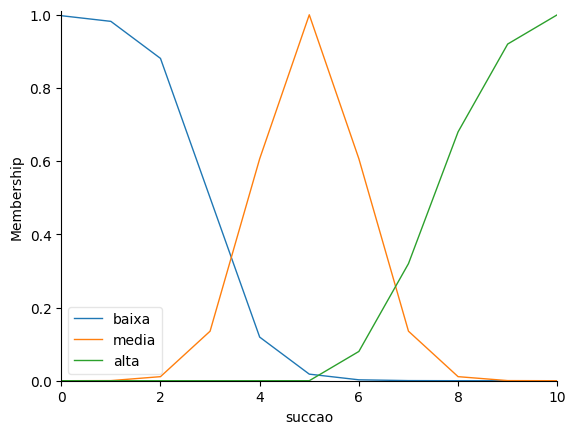

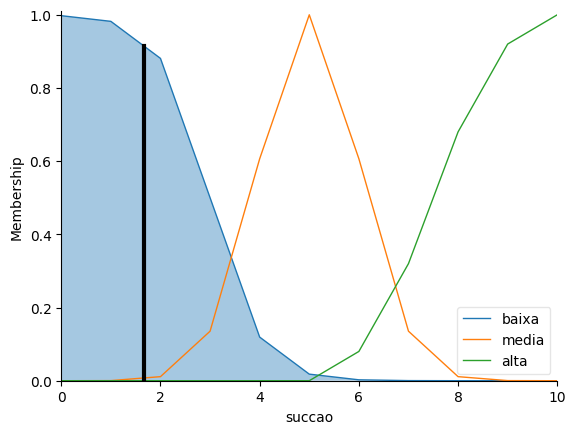

In [ ]:
# ----------------------------
#    DEFINIÇÃO DOS CONJUNTOS FUZZY DA SAÍDA 'succao' USANDO OUTROS FORMATOS
# ----------------------------

# Aqui você troca as funções de pertinência da saída 'succao':
# Em vez de triangulares (trimf), usa sigmoidal, gaussiana e função de platô (pimf).

# 1) Função Sigmoidal decrescente para 'baixa'
# - sigmf(universe, centro, inclinação)
# - Centro em 3, inclinação negativa (-2) para fazer a curva cair depois do centro.
succao['baixa'] = fuzz.sigmf(succao.universe, 3, -2)

# 2) Função Gaussiana para 'media'
# - gaussmf(universe, centro, desvio)
# - Centro em 5, desvio padrão 1: forma de sino bem concentrada.
succao['media'] = fuzz.gaussmf(succao.universe, 5, 1)

# 3) Função Platô (pimf) para 'alta'
# - pimf(universe, a, b, c, d)
# - Cria uma curva que cresce suavemente, forma um patamar, e decresce.
# - Aqui, entre 5 e 10, com patamar de 10 a 11.
succao['alta'] = fuzz.pimf(succao.universe, 5, 10, 10, 11)


succao.view() # Visualiza os três conjuntos fuzzy da variável de saída 'succao'

# ----------------------------
# 2️⃣ DEFINIÇÃO DAS REGRAS FUZZY
# ----------------------------
# Mesmas regras do exemplo anterior, agora usando as novas funções de pertinência.
regra1 = ctrl.Rule(superficie['facil'] & sujeira['leve'], succao['baixa']) # Regra 1: SE a superfície for fácil E a sujeira for leve → sucção baixa.
regra2 = ctrl.Rule(superficie['moderada'] & sujeira['leve'], succao['media']) # Regra 2: SE a superfície for moderada E a sujeira for leve → sucção média.
regra3 = ctrl.Rule(superficie['dificil'] | sujeira['pesada'], succao['alta']) # Regra 3: SE a superfície for difícil OU a sujeira for pesada → sucção alta.
regra4 = ctrl.Rule(sujeira['moderada'], succao['media']) # Regra 4: SE a sujeira for moderada → sucção média.

# ----------------------------
#    MONTAGEM DO SISTEMA DE CONTROLE FUZZY
# ----------------------------
sistema_controle = ctrl.ControlSystem([regra1, regra2, regra3, regra4]) # Cria o sistema de controle agrupando todas as regras.
sistema = ctrl.ControlSystemSimulation(sistema_controle) # Cria uma simulação do sistema para entradas específicas.

# ----------------------------
#    INSERÇÃO DOS VALORES DE ENTRADA E EXECUÇÃO
# ----------------------------
sistema.input['superficie'] = 0 # - superficie = 0 (interpretação: superfície muito fácil)
sistema.input['sujeira'] = 0 # - sujeira = 0 (interpretação: sujeira muito leve)
sistema.compute() # Processa a inferência fuzzy e calcula a saída.
print(sistema.output['succao']) # Imprime o valor numérico defuzzificado da saída 'succao'.
succao.view(sim=sistema) # Mostra o gráfico da variável de saída, destacando o valor calculado.

# Gráfico 3D

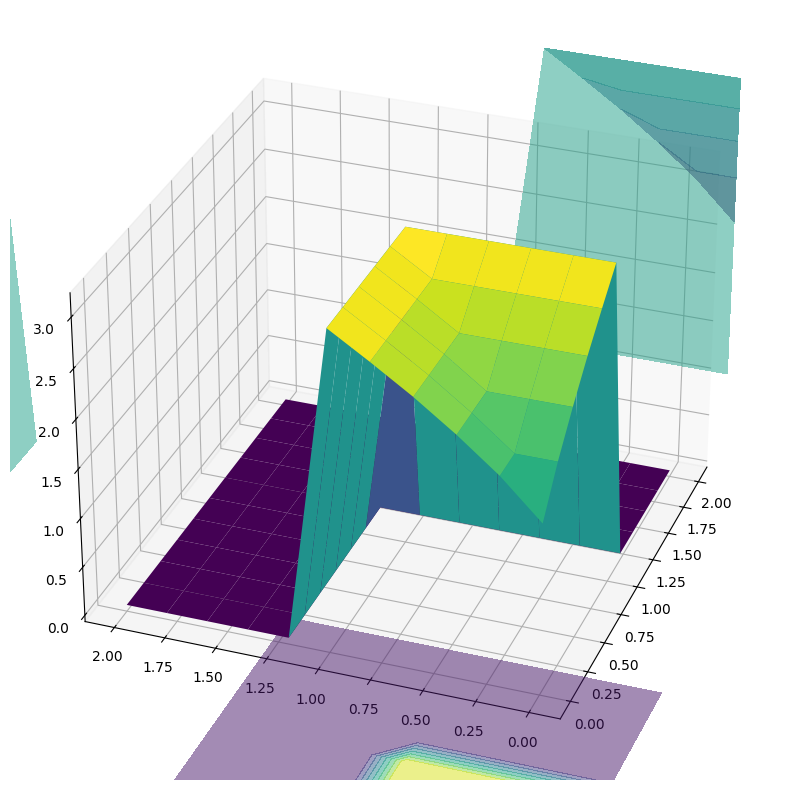

In [10]:
# ----------------------------
#     CRIA UMA NOVA SIMULAÇÃO PARA SUPERFÍCIE 3D
# ----------------------------
sistema3D = ctrl.ControlSystemSimulation(sistema_controle) # Cria uma nova instância de simulação para não interferir na anterior.
amostras = np.linspace(0, 2, 11) # Cria um vetor de amostras de 0 a 2, com 11 pontos igualmente espaçados. Assim, você pode ver a resposta em vários pontos dentro do universo.
x, y = np.meshgrid(amostras, amostras) # Cria uma grade 2D combinando todas as combinações possíveis de 'superficie' e 'sujeira'.
z = np.zeros_like(x) # Inicializa a matriz Z com zeros para armazenar os valores calculados de 'succao'.

# ----------------------------
#     CALCULA A SUPERFÍCIE DE RESPOSTA PARA CADA COMBINAÇÃO
# ----------------------------
# Para cada par (i, j) dentro de uma grade 6x6 (primeiros 6 pontos), define os valores de entrada, executa a inferência e armazena a saída 'succao'.
for i in range(6):
    for j in range(6):
        sistema3D.input['superficie'] = x[i, j]
        sistema3D.input['sujeira'] = y[i, j]
        sistema3D.compute()
        z[i, j] = sistema3D.output['succao']

# ----------------------------
#    PLOTA A SUPERFÍCIE 3D E SEUS CONTORNOS
# ----------------------------
fig = plt.figure(figsize=(10, 10)) # Cria uma figura com tamanho grande para visualização
ax = fig.add_subplot(111, projection='3d') # Adiciona um único subplot com projeção 3D
# Plota a superfície de resposta com um mapa de cores (cmap='viridis'), rstride e cstride definem o espaçamento da malha.
surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='viridis', linewidth=0.4, antialiased=True)
# Desenha contornos projetados nos planos Z, X e Y para mostrar como os níveis se cruzam. # offset define onde os contornos serão projetados.
cset = ax.contourf(x, y, z, zdir='z', offset=-2.5, cmap='viridis', alpha=0.5) # Contorno no plano Z (na base)
cset = ax.contourf(x, y, z, zdir='x', offset=3, cmap='viridis', alpha=0.5) # Contorno no plano X (lado direito)
cset = ax.contourf(x, y, z, zdir='y', offset=3, cmap='viridis', alpha=0.5) # Contorno no plano Y (lado esquerdo)
ax.view_init(30, 200) # Define o ângulo de elevação (30 graus) e rotação (200 graus)

# Exemplo com hard fuzzy:

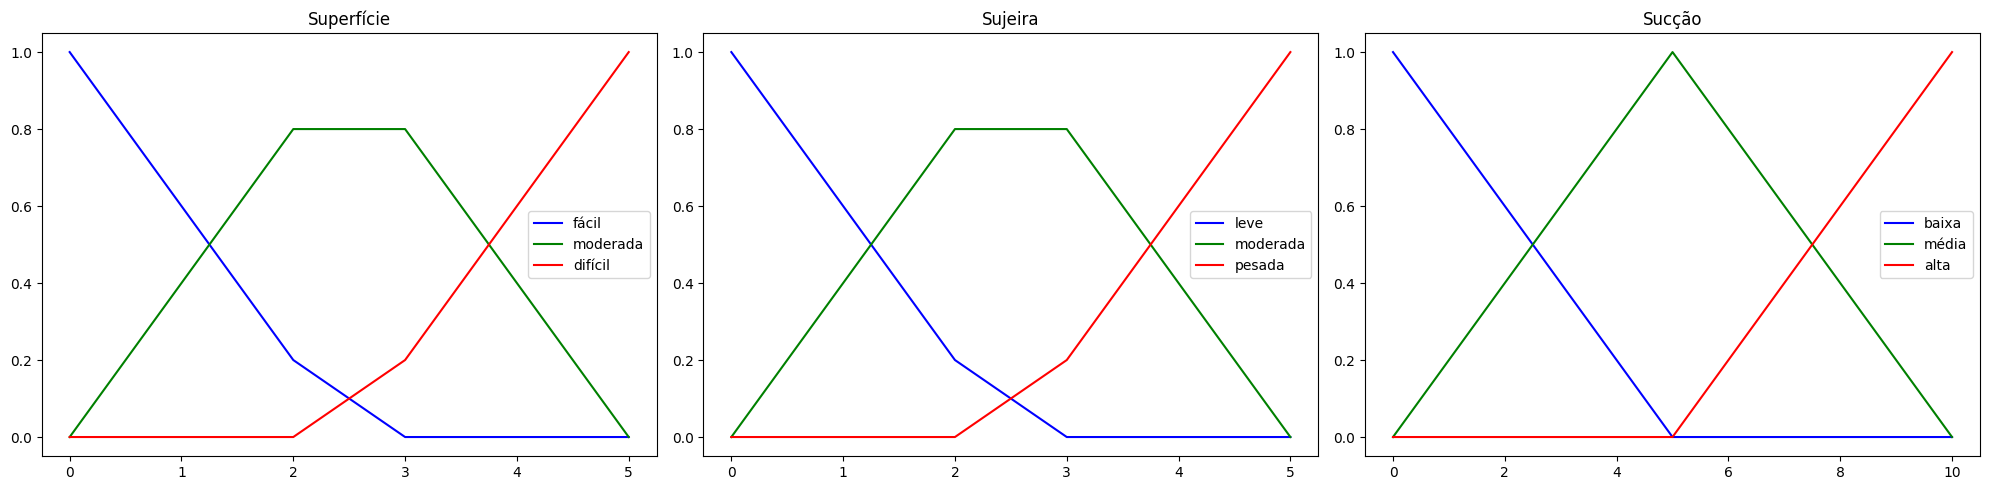

In [11]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# DEFINE OS EIXOS X PARA CADA VARIÁVEL
x_superficie = np.arange(0, 6, 1)
x_sujeira = np.arange(0, 6, 1)
x_succao  = np.arange(0, 11, 1)

# CALCULA AS FUNÇÕES DE PERTINÊNCIA PARA 'superficie'
y_superficie_facil = fuzz.trimf(x_superficie, [0, 0, 2.5])
y_superficie_moderada = fuzz.trimf(x_superficie, [0, 2.5, 5])
y_superficie_dificil = fuzz.trimf(x_superficie, [2.5, 5, 5])

# CALCULA AS FUNÇÕES DE PERTINÊNCIA PARA 'sujeira'
y_sujeira_leve = fuzz.trimf(x_sujeira, [0, 0, 2.5])
y_sujeira_moderada = fuzz.trimf(x_sujeira, [0, 2.5, 5])
y_sujeira_pesada = fuzz.trimf(x_sujeira, [2.5, 5, 5])

#  CALCULA AS FUNÇÕES DE PERTINÊNCIA PARA 'succao'
y_succao_baixa = fuzz.trimf(x_succao, [0, 0, 5])
y_succao_media = fuzz.trimf(x_succao, [0, 5, 10])
y_succao_alta = fuzz.trimf(x_succao, [5, 10, 10])

#  CRIA OS SUBPLOTS: 1 LINHA E 4 COLUNAS
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
axs[0].plot(x_superficie, y_superficie_facil, 'b', label='fácil')
axs[0].plot(x_superficie, y_superficie_moderada, 'g', label='moderada')
axs[0].plot(x_superficie, y_superficie_dificil, 'r', label='difícil')
axs[0].set_title('Superfície')
axs[0].legend()
axs[1].plot(x_sujeira, y_sujeira_leve, 'b', label='leve')
axs[1].plot(x_sujeira, y_sujeira_moderada, 'g', label='moderada')
axs[1].plot(x_sujeira, y_sujeira_pesada, 'r', label='pesada')
axs[1].set_title('Sujeira')
axs[1].legend()
axs[2].plot(x_succao, y_succao_baixa, 'b', label='baixa')
axs[2].plot(x_succao, y_succao_media, 'g', label='média')
axs[2].plot(x_succao, y_succao_alta, 'r', label='alta')
axs[2].set_title('Sucção')
axs[2].legend()
plt.tight_layout()
plt.show()

# Gráficos:

(Poder de Sucção) (LINHA) - Resultado:  5.631578947368422


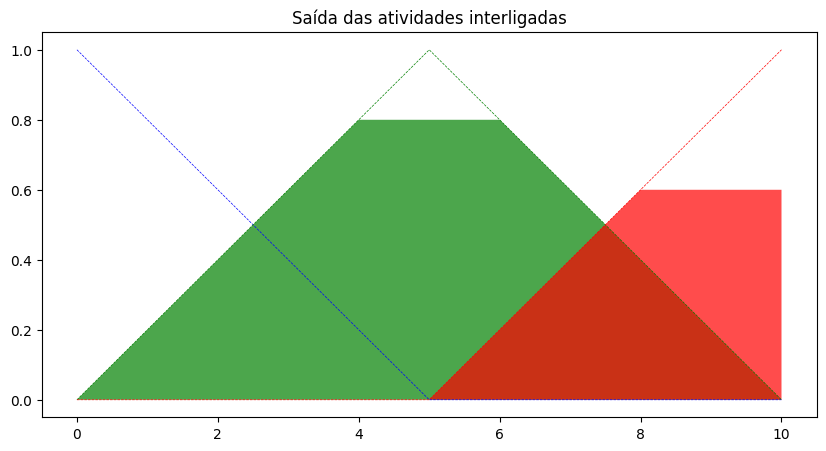

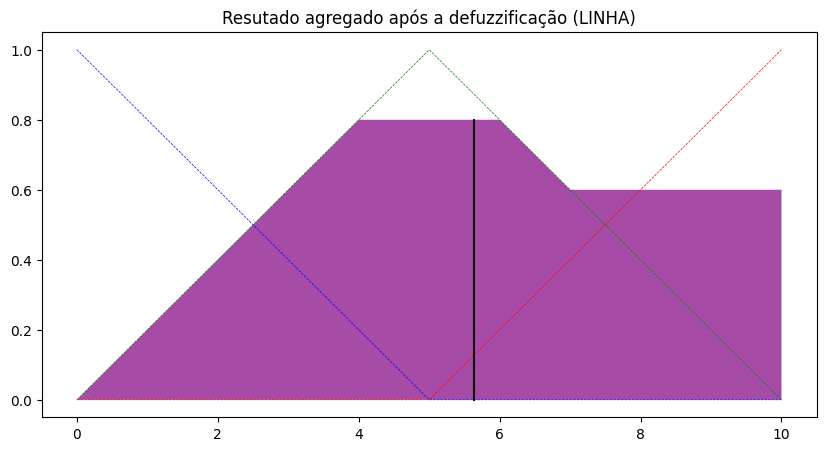

In [12]:
superficie_nivel_facil = fuzz.interp_membership(x_superficie, y_superficie_facil, 4.0)
superficie_nivel_moderada = fuzz.interp_membership(x_superficie, y_superficie_moderada, 4.0)
superficie_nivel_dificil = fuzz.interp_membership(x_superficie, y_superficie_dificil, 4.0)

sujeira_nivel_facil = fuzz.interp_membership(x_sujeira, y_sujeira_leve, 3.0)
sujeira_nivel_moderado = fuzz.interp_membership(x_sujeira, y_sujeira_moderada, 3.0)
sujeira_nivel_dificil = fuzz.interp_membership(x_sujeira, y_sujeira_pesada, 3.0)
regra1 = np.fmax(superficie_nivel_facil, sujeira_nivel_facil)
ativa_succao_baixa = np.fmin(regra1, y_succao_baixa)
regra2 = np.fmax(sujeira_nivel_moderado, sujeira_nivel_facil)
ativa_succao_media = np.fmin(regra2, y_succao_media)
regra3 = np.fmax(superficie_nivel_dificil, sujeira_nivel_dificil)
ativa_succao_alta = np.fmin(regra3, y_succao_alta)
regra4 = ativa_succao_media
x_succao0 = np.zeros_like(x_succao)


fig, ax0 = plt.subplots(figsize=(10, 5))
ax0.fill_between(x_succao, x_succao0, ativa_succao_baixa, facecolor='b', alpha=0.7)
ax0.plot(x_succao, y_succao_baixa, 'b', linewidth=0.5, linestyle='--', )
ax0.fill_between(x_succao, x_succao0, ativa_succao_media, facecolor='g', alpha=0.7)
ax0.plot(x_succao, y_succao_media, 'g', linewidth=0.5, linestyle='--')
ax0.fill_between(x_succao, x_succao0, ativa_succao_alta, facecolor='r', alpha=0.7)
ax0.plot(x_succao, y_succao_alta, 'r', linewidth=0.5, linestyle='--')
ax0.set_title('Saída das atividades interligadas');


controle = np.fmax(ativa_succao_baixa, np.fmax(ativa_succao_media, ativa_succao_alta))
succao = fuzz.defuzz(x_succao, controle, 'centroid')
#succao = fuzz.defuzz(x_succao, controle, 'bisector')
#succao = fuzz.defuzz(x_succao, controle, 'mom')
#succao = fuzz.defuzz(x_succao, controle, 'som')
#succao = fuzz.defuzz(x_succao, controle, 'lom')
succao_ativacao = fuzz.interp_membership(x_succao, controle, succao)

fig, ax0 = plt.subplots(figsize=(10, 5))

ax0.plot(x_succao, y_succao_baixa, 'b', linewidth=0.5, linestyle='--', )
ax0.plot(x_succao, y_succao_media, 'g', linewidth=0.5, linestyle='--')
ax0.plot(x_succao, y_succao_alta, 'r', linewidth=0.5, linestyle='--')
ax0.fill_between(x_succao, x_succao0, controle, facecolor='purple', alpha=0.7)
ax0.plot([succao, succao], [0, succao_ativacao], 'black', linewidth=1.5, alpha=0.9)
ax0.set_title('Resutado agregado após a defuzzificação (LINHA)')

print("(Poder de Sucção) (LINHA) - Resultado: ",  succao)